# MESSAGEix South Africa model
This notebook allows running the shale gas and carbon price scenarios described in the following manuscript:
> Orthofer et al. (2019) South Africa After Paris - Fracking Its Way to the NDCs? *Frontiers in Energy Research* 7(20). doi: [10.3389/fenrg.2019.00020](https://doi.org/10.3389/fenrg.2019.00020)

Note that the utils package imported below is part of the message_ix_south_africa repository. Before importing them, it is necessary to add the path to the root directory of the repository's local copy to the environment variable "PYTHONPATH" and (re-)start jupyter.

In [1]:
# Importing required packages
from utils.run_scenarios import *
from utils.pp_db_to_xlsx import results_to_xlsx
from utils.pp_plot_emissions import plot_emissions
from utils.pp_plot_power_sector import plot_power_sector
from utils.pp_plot_heatmaps import plot_heatmap_comparison

In [2]:
# define database and the baseline scenario
model = 'MESSAGE South Africa'
baseline = 'baseline'
database = 'message_sa'

In [11]:
mp = ixmp.Platform(dbprops=f'db/{database}', dbtype='HSQLDB')
base = message_ix.Scenario(mp, model=model, scenario=baseline)
base.remove_solution()
base.solve(model='MESSAGE-MACRO')
scenario = 'trial'#f'{s}USDpMWh-{c}USDtCO2'
scen = base.clone(model, scenario, keep_solution=False)
scen.set_as_default()
scen.check_out()
year = base.set('year').astype(int)
first_model_year = scen.cat('year', 'firstmodelyear')
model_years = list(year[year >= int(first_model_year)])

INFO:root:launching ixmp.Platform with local HSQLDB database at 'db/message_sa'


In [14]:
scen.set('commodity')

0      methanol
1      rc_therm
2          coal
3       i_therm
4       rc_spec
5     transport
6        i_feed
7       biomass
8      non-comm
9        electr
10     lightoil
11     crudeoil
12          gas
13      fueloil
14       i_spec
15         wind
16     solar_th
17        hydro
18     shalegas
19     solar_pv
dtype: object

In [13]:
scen.set_list()

array(['year', 'node', 'technology', 'relation', 'emission',
       'land_scenario', 'land_type', 'lvl_spatial', 'time',
       'lvl_temporal', 'type_node', 'type_tec', 'type_year',
       'type_emission', 'type_relation', 'mode', 'grade', 'level',
       'commodity', 'rating', 'shares', 'type_addon', 'sector',
       'map_spatial_hierarchy', 'map_node', 'map_temporal_hierarchy',
       'map_time', 'cat_node', 'cat_tec', 'cat_year', 'cat_emission',
       'type_tec_land', 'cat_relation', 'level_resource',
       'level_renewable', 'level_stocks', 'map_shares_commodity_total',
       'map_shares_commodity_share', 'addon', 'cat_addon',
       'map_tec_addon', 'mapping_macro_sector', 'balance_equality'],
      dtype='<U26')

In [12]:
scen.par_list()

array(['commodity_stock', 'demand', 'resource_cost', 'resource_remaining',
       'bound_extraction_up', 'resource_volume', 'technical_lifetime',
       'capacity_factor', 'operation_factor', 'min_utilization_factor',
       'inv_cost', 'fix_cost', 'var_cost', 'output', 'input',
       'abs_cost_new_capacity_soft_up', 'abs_cost_new_capacity_soft_lo',
       'level_cost_new_capacity_soft_up',
       'level_cost_new_capacity_soft_lo', 'abs_cost_activity_soft_up',
       'abs_cost_activity_soft_lo', 'level_cost_activity_soft_up',
       'level_cost_activity_soft_lo', 'bound_new_capacity_up',
       'bound_new_capacity_lo', 'bound_total_capacity_up',
       'bound_total_capacity_lo', 'bound_activity_up',
       'bound_activity_lo', 'initial_new_capacity_up',
       'growth_new_capacity_up', 'soft_new_capacity_up',
       'initial_new_capacity_lo', 'growth_new_capacity_lo',
       'soft_new_capacity_lo', 'initial_activity_up',
       'growth_activity_up', 'soft_activity_up', 'initial_activi

In [3]:
# shale gas extraction costs (USDpMWh) & carbon costs (USDtCO2) to model
# shale_cost = list(range(1, 32, 2)) + [10000]
# carbon_cost = list(range(0, 62, 2))
#shale_cost = [1, 10, 30, 1000]
#carbon_cost = [0, 5, 15, 30]
shale_cost = [1]
carbon_cost=[5]

# run the scenarios
run_scenarios(model, baseline, database, shale_cost, carbon_cost)

In [5]:
# run the postprocessing
results_to_xlsx(model, baseline, database, shale_cost, carbon_cost)

INFO:root:launching ixmp.Platform with local HSQLDB database at 'db/message_sa'


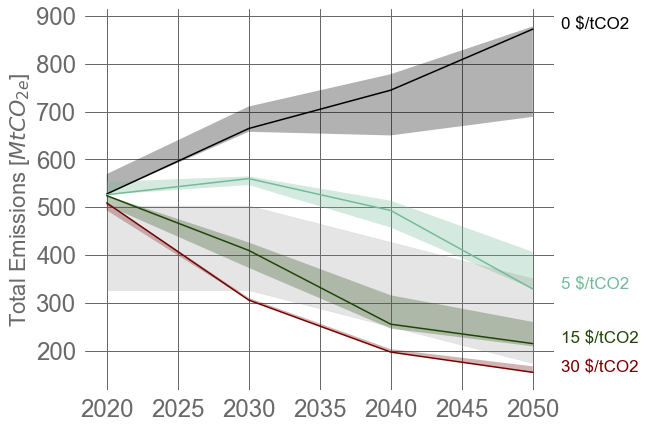

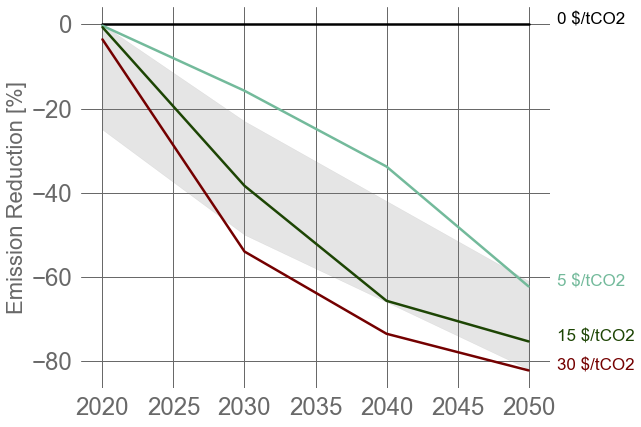

In [6]:
# plot ghg-emissions over the model horizon
plot_emissions()

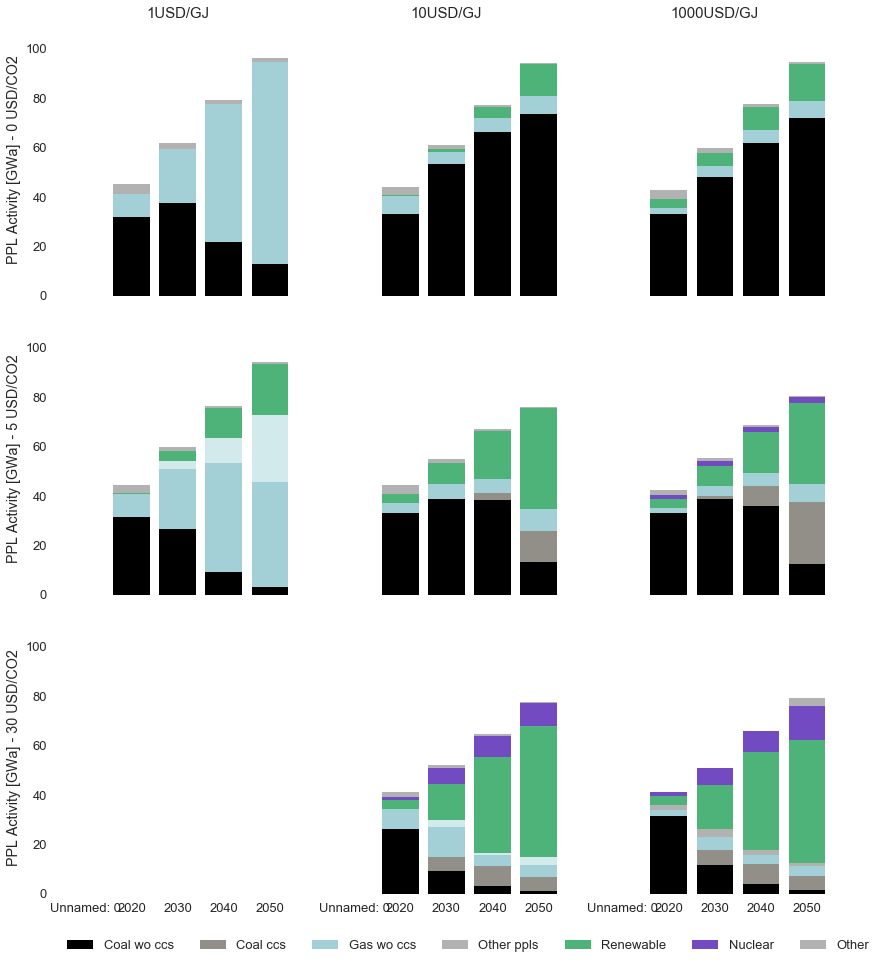

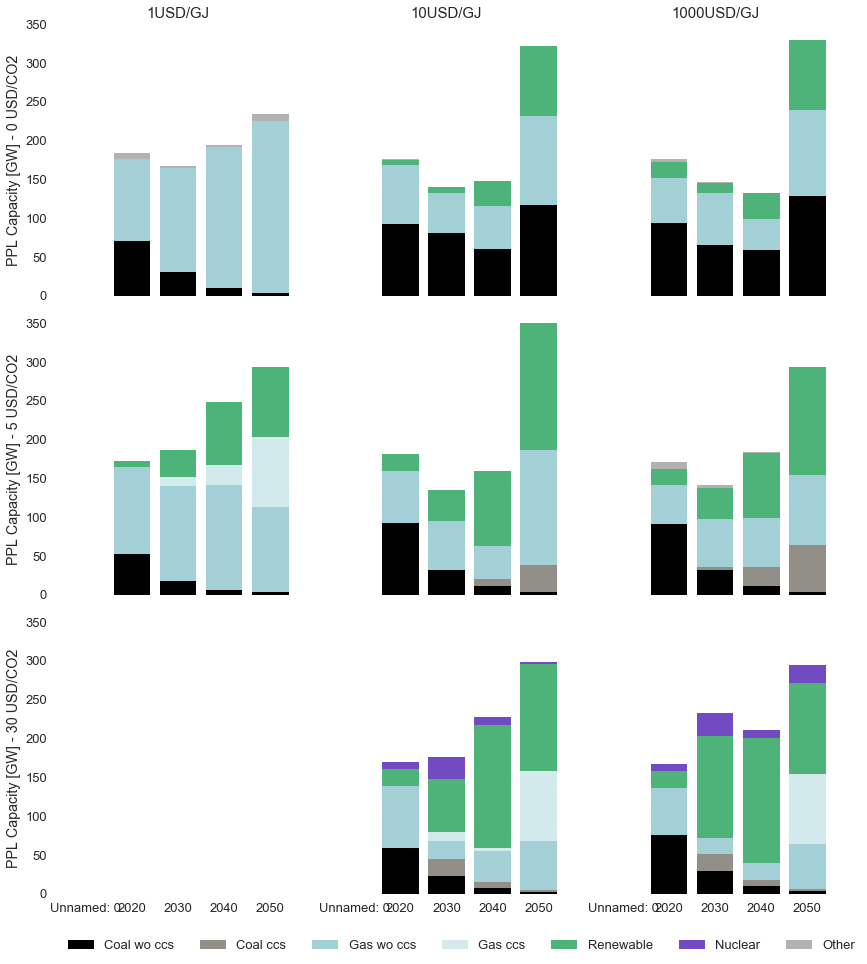

In [7]:
# plot energy and capacity mix of the power sector
plot_power_sector()

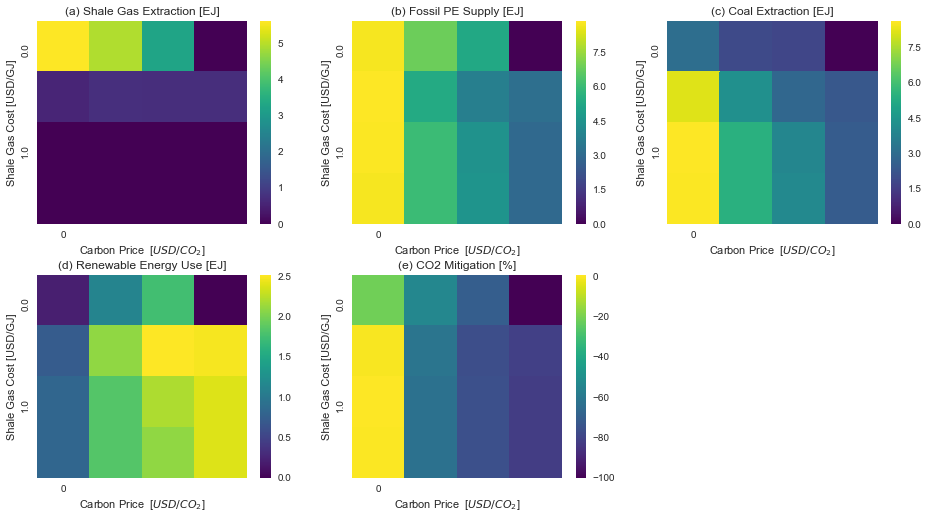

In [8]:
# plot the scenario analysis heat maps - the variable 'years' indicates
# which years are presented in the plot
plot_heatmap_comparison(years=[2050])